# Let's see what the computer sees

*Neurons for Vision*

Here we will be using the Fashion MNIST Dataset for experimentation.
Each of our images is a set of 784 values (28 × 28) between 0 and 255. They can be
our X. We know that we have 10 different types of images in our dataset, so let’s con‐
sider them to be our Y. Now we want to learn what the function looks like where Y is
a function of X.

*Exploring the Data*

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
data = tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


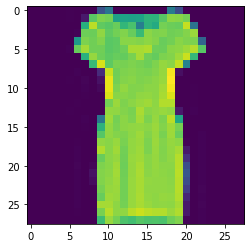

In [10]:
plt.imshow(train_images[20])
plt.show()

*Normalizing the Data*

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

*Neuron Architecture*

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

* Flatten - Turns a 2D array into 1D in this case, making 28*28 into 784.
* Relu - Activation function that outputs values either 0 or greater than zero.
* Softmax - Used in cases of multiclass classification since it outputs only the most likely probability
* Metrics - Way to measure our progress

In [29]:
#collapse_output
model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ])

model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5013 - accuracy: 0.8235
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3754 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3367 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3132 - accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2937 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2822 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2691 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2588 - accuracy: 0.9031
Epoch 9/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2488 - accuracy: 0.9074s - l
Epoch 10/

*Evaluating*

In [30]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - ETA: 0s - loss: 0.3362 - accuracy: 0.88 - 0s 39us/sample - loss: 0.3351 - accuracy: 0.8800


[0.3351069624185562, 0.88]

* Training set accuracy: [90.98%]
* Test set accuracy : [88%]


**Exploring the Model Output**

In [31]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[1.4614162e-07 3.7705106e-09 2.0430624e-09 2.1551809e-09 9.3017638e-10
 4.5569852e-04 4.8079949e-07 7.8137349e-03 3.7059172e-07 9.9172956e-01]
9


You’ll notice that the classification gives us back an array of values. These are the val‐
ues of the 10 output neurons. The label is the actual label for the item of clothing, in
this case 9. Take a look through the array—you’ll see that some of the values are very
small, and the last one (array index 9) is the largest by far. These are the probabilities
that the image matches the label at that particular index. So, what the neural network
is reporting is that there’s a 91.4% chance that the item of clothing at index 0 is label 9.
We know that it’s label 9, so it got it right.

## Training for longer - Discovering Overfitting

Here we will increase the no. of epochs to 50 & see how it helps in the accuracies

In [34]:
#collapse_output
model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ])

model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4981 - accuracy: 0.8234
Epoch 2/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3710 - accuracy: 0.8665
Epoch 3/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3333 - accuracy: 0.8783
Epoch 4/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3132 - accuracy: 0.8850
Epoch 5/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2953 - accuracy: 0.8904s - loss: 0.2958 - accuracy: 
Epoch 6/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2811 - accuracy: 0.8960
Epoch 7/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2694 - accuracy: 0.9003
Epoch 8/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2584 - accuracy: 0.9038
Epoch 9/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.

In [33]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4944 - accuracy: 0.8847


[0.4943554855763912, 0.8847]

* Training set accuracy: [98.03%]
* Test set accuracy : [88.47%]

## Stopping Training

In each of the cases so far, we’ve hardcoded the number of epochs we’re training for.
While that works, we might want to train until we reach the desired accuracy instead
of constantly trying different numbers of epochs and training and retraining until we
get to our desired value. So, for example, if we want to train until the model is at 95%
accuracy on the training set, without knowing how many epochs that will take, how
could we do that?
The easiest approach is to use a callback on the training. Let’s take a look at the upda‐
ted code that uses callbacks:


In [36]:
#collapse_output
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy, stopping...")
            self.model.stop_training=True
callbacks = myCallback()

model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ])

model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model.fit(train_images,train_labels,callbacks=[callbacks],epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 180us/sample - loss: 0.5009 - accuracy: 0.8245
Epoch 2/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3758 - accuracy: 0.8641
Epoch 3/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3380 - accuracy: 0.8771
Epoch 4/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3151 - accuracy: 0.8839
Epoch 5/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2955 - accuracy: 0.8916
Epoch 6/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2812 - accuracy: 0.8954
Epoch 7/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2667 - accuracy: 0.9013
Epoch 8/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2558 - accuracy: 0.9039s - loss: 0.2 - ETA: 2s - loss: 0.2500  - ETA: 1s - loss: 0.2535 -  - ETA: 0s - loss: 0.2538 - accu
Epoch 9/50
60000/600

In [37]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.4173 - accuracy: 0.8918


[0.41726961513757704, 0.8918]

*See how early stopping gave better results on test data.*